 <pre>
Q1.
    a. Please download the data from <a href="http://archive.ics.uci.edu/ml/datasets/Liver+Disorders">http://archive.ics.uci.edu/ml/datasets/Liver+Disorders </a>
    b. Get to know about the features
        i. given data set has 6 attributes and 1 output varaible
    c. Find me the two most corelated feature out of 6 attributes with the output varaible
    d. Prove that the features are correlated with output varaible using null hypothsis test
        i.hint: consider 100 random samples from the data set and find out the correlation, repeat it for 50 times
        </pre>

In [2]:
#The following is certain basic information about given data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
b = pd.read_csv("bupa.data.txt")
print (b.shape)
print b.describe()#calculates measures of central tendancy
print b.info()#info about memory taken & datatypes
print (b.columns)
print (b["selector"].value_counts())
#Here we are calculating the standard deviation of each attribute
std = []
std.append(np.std(b["mcv"]))
std.append(np.std(b["alkphos"]))
std.append(np.std(b["sgpt"]))
std.append(np.std(b["sgot"]))
std.append(np.std(b["gammagt"]))
std.append(np.std(b["drinks"]))
std.append(np.std(b["selector"]))
print std
#Now we are calculating the covariance between each attribute and the class which classifies.
test = []
tmp=(np.cov(b["mcv"],b["selector"]))
test.append(tmp[0][1])
tmp=(np.cov(b["alkphos"],b["selector"]))
test.append(tmp[0][1])
tmp=(np.cov(b["sgpt"],b["selector"]))
test.append(tmp[0][1])
tmp=(np.cov(b["sgot"],b["selector"]))
test.append(tmp[0][1])
tmp=(np.cov(b["gammagt"],b["selector"]))
test.append(tmp[0][1])
tmp=(np.cov(b["drinks"],b["selector"]))
test.append(tmp[0][1])
print test
#To find the correlation of each attribute on the selector we should find correlation coefficinet between the selector class and
#each attribute separatley.
#Here we are calculating Pearson coefficient.
corr = []
i=0
while i<6:
    corr.append(test[i]/(std[i] * std[6]))
    i+=1
print corr
print b.corr(method='pearson')

(345, 7)
              mcv     alkphos        sgpt        sgot     gammagt      drinks  \
count  345.000000  345.000000  345.000000  345.000000  345.000000  345.000000   
mean    90.159420   69.869565   30.405797   24.643478   38.284058    3.455072   
std      4.448096   18.347670   19.512309   10.064494   39.254616    3.337835   
min     65.000000   23.000000    4.000000    5.000000    5.000000    0.000000   
25%     87.000000   57.000000   19.000000   19.000000   15.000000    0.500000   
50%     90.000000   67.000000   26.000000   23.000000   25.000000    3.000000   
75%     93.000000   80.000000   34.000000   27.000000   46.000000    6.000000   
max    103.000000  138.000000  155.000000   82.000000  297.000000   20.000000   

         selector  
count  345.000000  
mean     1.579710  
std      0.494322  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      2.000000  
max      2.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data colu

By looking at the above correlated values we observe that only 2 values are postive for Pearson correlation coefficient.
Therfore we can conclude that sgot and gammangt are the 2 most correlated features.

In [40]:
#We now take a random sample of 100 from sgot and gammagt and repeat the experiment for 50 times and test the samples using
#Hypothesis testing.
#Here we assume our Null hypothesis : sgot and gammagt are not correlated.
t1=b["sgot"]
t2=b["gammagt"]
t3=b["selector"]
count=0
i=0
sgot =[]
gammagt =[]
selector =[]
while i<50:
    sample= random.sample(range(0,344),100)
    j=0
    while j<100:
        sgot.append(t1[sample[j]])
        gammagt.append(t2[sample[j]])
        selector.append(t3[sample[j]])
        j+=1
    s1=np.std(sgot)
    s2=np.std(gammagt)
    s3=np.std(selector)
    c1=np.cov(sgot,selector)
    c2=np.cov(gammagt,selector)
    cr1=c1[0][1]/(s1 *s3)
    cr2=c2[0][1]/(s2 *s3)
    #print("%f %f" %(cr1,cr2))
    if cr1 >0 and cr2>0:
        count+=1
    #print count
    i+=1
    del sgot[:]
    del gammagt[:]
    del selector[:]
#print count
print ("%f" %(count/50.0))
if (count/50.0)>0.5:
    print"sgot and gammagt are the 2 most correlated features"

0.980000
sgot and gammagt are the 2 most correlated features


Our Null Hypothesis which states that sgot and gammagt are not correlated is proven wrong.
We got the correlation coefficient for 100 samples which repeated 50 times as an experiment as greater than 0.5.
Therefore after hypothesis testing we can conclude that sgot and gammagt are 2 most correlted features.

<pre>
Q2.
    a. Simulate the coin tossing by writing a function wich gives the output "head" with 50% chance and "tail" with 50% chance
    b. call the same function 250 times, find out the number tests which gave the output "head"
    c. based on the result conclude that the coin is baised or not
    d. prove your conclusion with the help of null hypothisis test
    </pre>

In [47]:
def toss():
    n=random.uniform(0,1)
    if n>0 and n<0.5:
        return 1
    else:
        return 0
i=0
head=0
while i<250:
    x=toss()
    head+=x
    i+=1
tail=250-head
print ("%d %d" %(head,tail))
if head!=tail:
    print"Coin is biased"
else:
    print"Coin is unbiased"
    

144 106
Coin is biased


By looking at the number of heads and tails for the above experiment we can conclude that the coin is biased.
Now we have to prove it using  Hypothesis test.
We consider our Null Hypothesis as : Coin is unbiased.
Now we perform the same experiment of calling the same function 250 times.This experiment is again repeated 500 times.
The code which performs the experiment is given below.

In [60]:
i=0
count1=0
while i<500:
    j=0
    h=0
    while j<250:
        x=toss()
        h+=x
        j+=1
    t=250-h
    if t==h:
        count1+=1
    i+=1
print("We are getting both the head and tail with equal chance for %d experiments with probability of %f" %(count1,count1/2.0))
if count1/500 >0.5:
    print"Coin is unbiased"
else:
    print"Coin is biased"

We are getting both the head and tail with equal chance for 20 experiments with probability of 10.000000
Coin is biased


By observing the above experiment we can conclude that the coin is biased which is a contradiction to our null hypothesis.
Therfore our coin is biased.


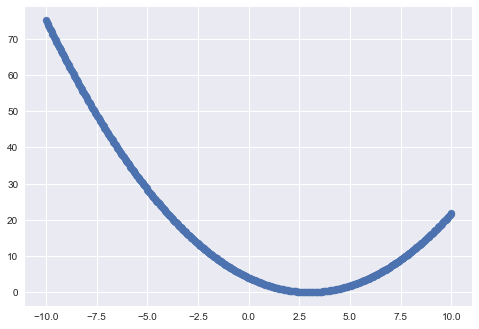

-0.757293147305


SpearmanrResult(correlation=-0.65553142212568849, pvalue=1.0024014496100716e-62)

In [9]:
import numpy as np
import math
import scipy 
def genarate_data():
    X = np.linspace(-10,10, 500)
    Y = [(4.0 / 3 ** 2) * (x - 3) ** 2 for x in X]
    return X, Y

x,y=genarate_data()

# print x
# print y
plt.scatter(x,y)
plt.show()
pear=np.corrcoef(x,y)[0,1]
print pear
spear=scipy.stats.spearmanr(x,y)
#spear=np.corrcoef(x,y)
spear
#As it can be observed the given equation is a parabola.
#For this we are getting both the spearman and pearson correlation coefficient as nan.

<pre>
Q3. 
    a. call the function genarate_data() to get two vectors, "X, Y = genarate_data()"
    b. find out the trasofrmation of given vectors which will help us to find the correlation between X, Y with the help of techniques that are discussed in the class (Pearson Product Moment Correlation, Spearman rank Order Correlation)
        hint: use the techniques that are discussed in the class while solving "X^2 + Y^2 =a^2 (circle data)"
    </pre>